In [1]:
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
import numpy as np
from google.colab import drive
import csv
from tensorflow import keras
import matplotlib.dates as dt
import matplotlib.pyplot as plt
import glob
drive.mount ('/drive/') 

Mounted at /drive/


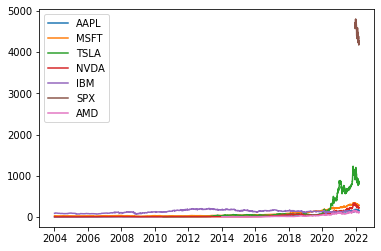

In [2]:
data =  {}
for sto in os.scandir ('/drive/MyDrive/stock/stock_historical_data'):
  s=sto.name[:-4]
  c=[]
  o=[]
  d=[]
  
  close_index = 0
  date_index = 0
  open_index = 0
  with open ("/drive/MyDrive/stock/stock_historical_data/"+s+".csv",'r') as file:
    csv_reader = csv.reader (file)
    for linect,i in enumerate(csv_reader):
      if (linect == 0):
        close_index = i.index ('Close')
        open_index = i.index ('Open')
        date_index =i.index('Date')
      else:
        o.append (float (i[open_index]))
        c.append (float(i[close_index]))
        d.append (dt.datestr2num(i[date_index]))
  plt.plot_date(d,c,ls='-',marker="",label = s)
  data[s]  = {'open':np.asarray(o),'close':np.asarray(c), 'date':np.asarray(d)}
plt.legend()
plt.show()
plt.clf()
plt.cla()
plt.close()

In [3]:
scaler = MinMaxScaler(feature_range= (0,1))
stocks_to_process = [os.path.basename(os.path.normpath(f))[:-4] for f in glob.glob (pathname='/drive/MyDrive/stock/stock_historical_data/*.csv')]
print (stocks_to_process)
def minmax (stock):
  for i in stock:
   
    data[i]['close']=scaler.fit_transform ( np.array(data[i]['close']).reshape(-1,1))
    data[i]['open']=scaler.fit_transform (np.array(data[i]['open']).reshape (-1,1))
   # data[i]['close']= np.array(data[i]['close']).reshape(-1,1)
   # data[i]['open']=np.array(data[i]['open']).reshape (-1,1)


minmax(stocks_to_process)

['AAPL', 'MSFT', 'TSLA', 'NVDA', 'IBM', 'SPX', 'AMD']


Predicting with AAPL


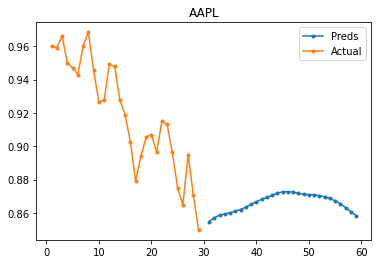

Predicting with TSLA


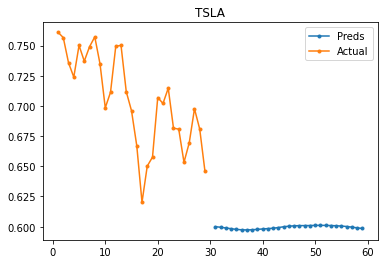

Predicting with MSFT


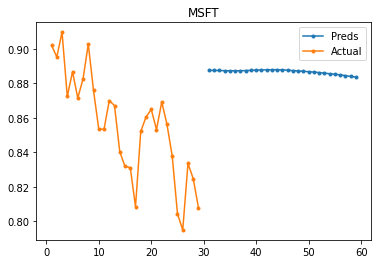

Predicting with NVDA


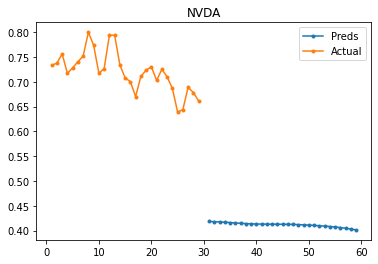

Predicting with IBM


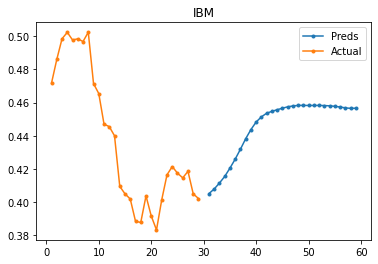

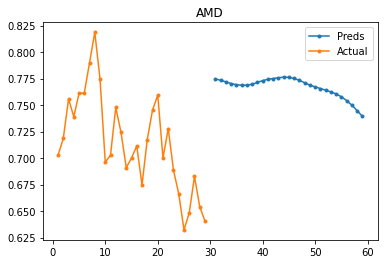

In [4]:

def train_test (stock_name,pred_days= 160):
    predicting = np.concatenate((data[stock_name]['open'][-pred_days:],data[stock_name]['close'][-pred_days:]),axis =1)
    return predicting


def create_dataset(dataset, time_step=1,days=30):
  
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-days-1):
    a = dataset[i:(i+time_step)]
    dataX.append(a)
    dataY.append(dataset[i + time_step+days,1])
   
  return np.array(dataX), np.array(dataY)

def setup (stock,time_step  = 100):
   
      pre= train_test(stock)
      
      labels_test,data_test=create_dataset(pre,time_step)
      return labels_test,data_test

def trainer (path,labels_test,data_test,stock,days=30):
  print ('Predicting with {}'.format (stock))
  model=keras.models.load_model(path)
  results= model.predict (labels_test).reshape (-1,1)
  plt.plot ([i+1+days for i in range (len(results))],results,label = "Preds",marker='.')
  plt.plot ([i+1 for i in range (len(results))],data_test,label = 'Actual',marker = '.')
  plt.legend()
  plt.title (stock)
  plt.show()
  plt.clf()
  plt.cla()
  plt.close()

def run (stocks):
  
  for path in stocks:
    try:
      stock_name = os.path.basename(os.path.normpath(path))
      labels_test,data_test=setup (stock_name)
      trainer (path,labels_test,data_test,stock_name)
    except:
      print ("Something went wrong, but im not troubleshooting it so good luck trying to find the one bug thats hidden in plain sight!")
run (glob.glob (pathname='/drive/MyDrive/stock/model_weights/*'))
    



  